In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Perceptual decision making

### Exercise 1

In [2]:
t_steps = 75

In [3]:
def open_data(f_name):
    data = np.loadtxt(f'saved_data/{f_name}')
    return data

In [4]:
U = open_data('pdm_ex1_U')
y = open_data('pdm_ex1_y')

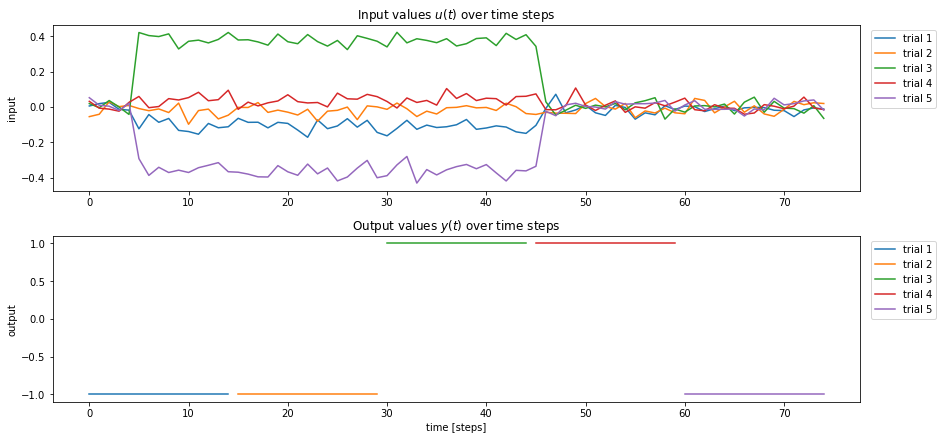

In [5]:
fig, axs = plt.subplots(2, 1, figsize = (13, 6), constrained_layout = True)
for trial in range(U.shape[0]):
    axs[0].set_title(r'Input values $u(t)$ over time steps')
    axs[0].plot(np.arange(0, t_steps, 1), U[trial], label = f'trial {trial+1}')
    axs[0].set_ylabel('input')
    
    axs[1].set_title(r'Output values $y(t)$ over time steps')
    axs[1].plot(np.arange(trial * t_steps/U.shape[0], (trial+1) * t_steps/U.shape[0], 1), 
                np.full(int(t_steps/U.shape[0]), y[trial]), label = f'trial {trial+1}')
    axs[1].set_ylabel('output')
    axs[1].set_xlabel('time [steps]')

for i in range(2):
    axs[i].legend(loc = 'upper right', bbox_to_anchor = (1.1, 1))
plt.show()

### Exercise 3

In [6]:
n_epochs = 200
rank = 1

In [7]:
loss = open_data('pdm_ex3_loss')
xlog = open_data('pdm_ex3_xlog')
zlog = open_data('pdm_ex3_zlog')
y = open_data('pdm_ex3_y')

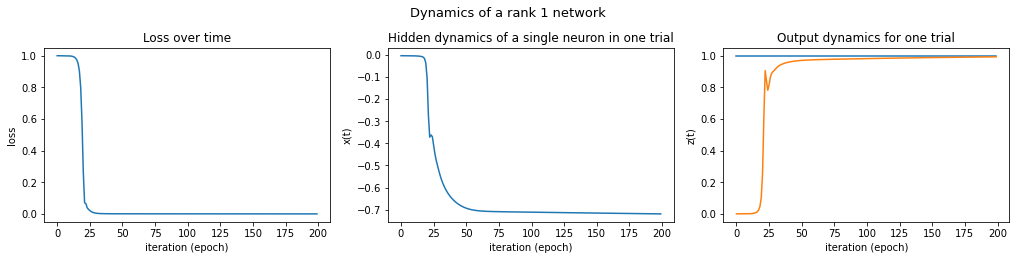

In [8]:
# Plot the loss, hidden and output dynamics.
plots = [loss.flatten(), xlog, np.full(n_epochs, y[0]), zlog]
titles = ['Loss over time', 'Hidden dynamics of a single neuron in one trial', 'Output dynamics for one trial']
y_labels = ['loss', 'x(t)', 'z(t)']
fig, axs = plt.subplots(1, 3, figsize = (14, 3.5), constrained_layout = True)
fig.suptitle(f'Dynamics of a rank {rank} network', fontsize = 13)
for i in range(3):
    axs[i].plot(plots[i])
    axs[i].set_title(titles[i])
    axs[i].set_xlabel('iteration (epoch)')
    axs[i].set_ylabel(y_labels[i])
    if i == 2:
        axs[i].plot(plots[3])
        plt.show()

### Exercise 4

In [9]:
def plt_cov(cov, title, labels):
    fig, ax = plt.subplots()
    fig.canvas.draw()
    
    ax.set_xticks(np.arange(0, len(labels), 1))
    ax.set_yticks(np.arange(0, len(labels), 1))
    ax.set_xticklabels(labels) 
    ax.set_yticklabels(labels) 
    
    im = ax.imshow(cov)
    fig.colorbar(im)
    ax.set_title(title)
    plt.show()

In [10]:
cov = open_data('pdm_ex4_cov')
mnIw = open_data('pdm_ex4_mnIw')
np.fill_diagonal(cov, 0)

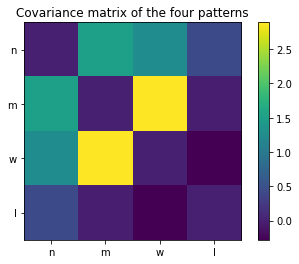

In [11]:
cov_labels = ['n', 'm', 'w', 'I']
plt_cov(cov, 'Covariance matrix of the four patterns', cov_labels)

Covariance matrix with diagonals artificially set to zero.

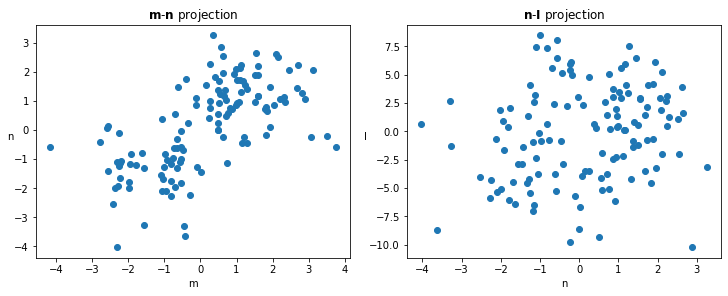

In [12]:
fig, axs = plt.subplots(1, 2, figsize = (10, 4), constrained_layout = True)

axs[0].set_title(r'$\mathbf{m}$-$\mathbf{n}$ projection')
axs[0].scatter(mnIw[0], mnIw[1])
axs[0].set_xlabel('m')
axs[0].set_ylabel('n', rotation = 'horizontal')

axs[1].set_title(r'$\mathbf{n}$-$\mathbf{I}$ projection')
axs[1].scatter(mnIw[1], mnIw[2])
axs[1].set_xlabel('n')
axs[1].set_ylabel('I', rotation = 'horizontal')
plt.show()

### Exercise 5

In [13]:
cov_sampled = open_data('pdm_ex5_cov')
mnIw = open_data('pdm_ex5_sampled')
np.fill_diagonal(cov_sampled, 0)

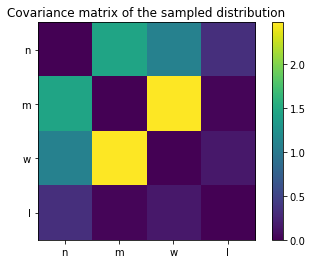

In [14]:
plt_cov(cov_sampled, 'Covariance matrix of the sampled distribution', cov_labels)

Covariance matrix with diagonals artificially set to zero.

### Exercise 6

In [15]:
data_size = 32
m_I_space = open_data('pdm_ex6_mIspace')
x_t_flattened = open_data('pdm_ex6_xt')
x_t = x_t_flattened.reshape(x_t_flattened.shape[0], data_size, t_steps)

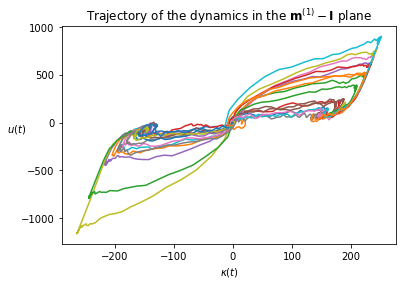

In [16]:
for trial in range(data_size):
    x_projected = m_I_space @ x_t[:,trial,:]
    plt.plot(x_projected[0], x_projected[1])
plt.xlabel(r'$\kappa (t)$')
plt.ylabel(r'$u(t)$', rotation = 'horizontal')
plt.title(r'Trajectory of the dynamics in the $\mathbf{m}^{(1)}-\mathbf{I}$ plane')
plt.show()

### Exercise 7

In [17]:
nu = open_data('pdm_ex7_nu')
kappa = open_data('pdm_ex7_kappa')
z = open_data('pdm_ex7_z')

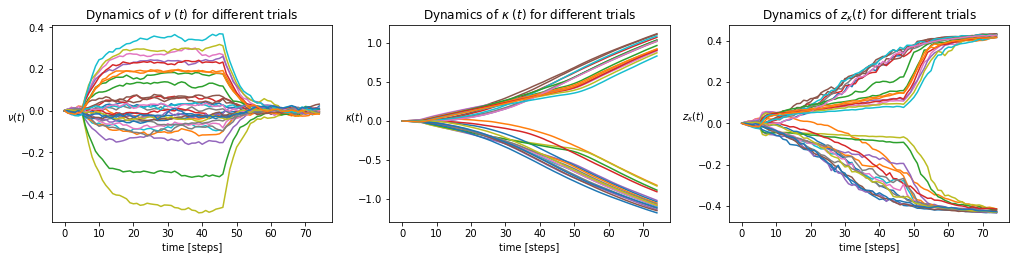

In [18]:
fig, axs = plt.subplots(1, 3, figsize = (14, 3.5), constrained_layout = True)
axs[0].plot(nu.T)
axs[0].set_ylabel(r'$\nu (t)$', rotation = 'horizontal')
axs[0].set_title(r'Dynamics of $\nu \; (t)$ for different trials')
axs[1].plot(kappa.T)
axs[1].set_ylabel(r'$\kappa (t)$', rotation = 'horizontal')
axs[1].set_title(r'Dynamics of $\kappa \; (t)$ for different trials')
axs[2].plot(z.T)
axs[2].set_ylabel(r'$z_{\kappa}(t)$', rotation = 'horizontal')
axs[2].set_title(r'Dynamics of $z_{\kappa}(t)$ for different trials')
for i in range(3):
    axs[i].set_xlabel('time [steps]')
plt.show()

In [19]:
acc_score_train = open_data('pdm_ex7_accscoretrain')
acc_score_sampled = open_data('pdm_ex7_accscoresampled')
acc_score_reduced = open_data('pdm_ex7_accscorereduced')

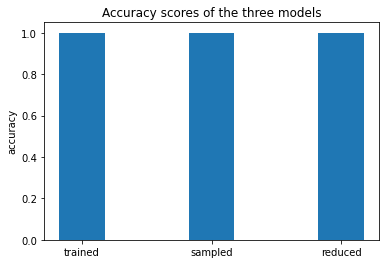

In [20]:
scores = np.array([acc_score_train, acc_score_sampled, acc_score_reduced])
acc_labels = ['trained', 'sampled', 'reduced']
plt.bar(acc_labels, scores, width = 0.35)
plt.ylabel('accuracy')
plt.title('Accuracy scores of the three models')
plt.show()

## Parametric working memory

### Exercise 1

In [21]:
trial_size = 32
rank = 2

U_PM = open_data('pwm_ex1_U')
y_PM = open_data('pwm_ex1_y')

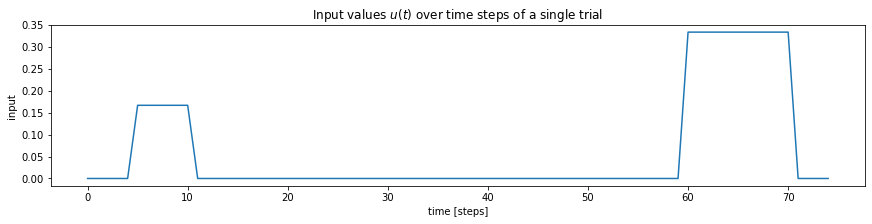

In [22]:
fig = plt.subplots(1, 1, figsize = (12, 3), constrained_layout = True)

for trial in range(trial_size):
    # Plot a trial with f_1 < f_2 to match the plot in the paper.
    if U_PM[trial][5] < U_PM[trial][60] and U_PM[trial][5] > 0:
        plt.plot(U_PM[trial])
        plt.title(r'Input values $u(t)$ over time steps of a single trial')
        plt.xlabel('time [steps]')
        plt.ylabel('input')
        break
plt.show()

### Exercise 3

In [23]:
loss_PM = open_data('pwm_ex3_loss_PM')

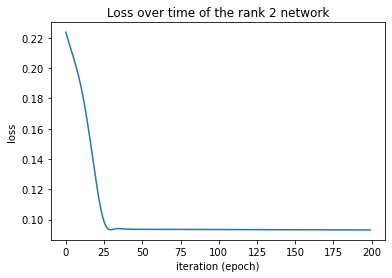

In [24]:
plt.plot(loss_PM)
plt.title('Loss over time of the rank 2 network')
plt.xlabel('iteration (epoch)')
plt.ylabel('loss')
plt.show()

In [25]:
n_minibatches = 6

U_PM_curr_flattened = open_data('pwm_ex3_Ucurr')
U_PM_curr = U_PM_curr_flattened.reshape(U_PM_curr_flattened.shape[0], trial_size, t_steps)
y_PM_curr = open_data('pwm_ex3_ycurr')

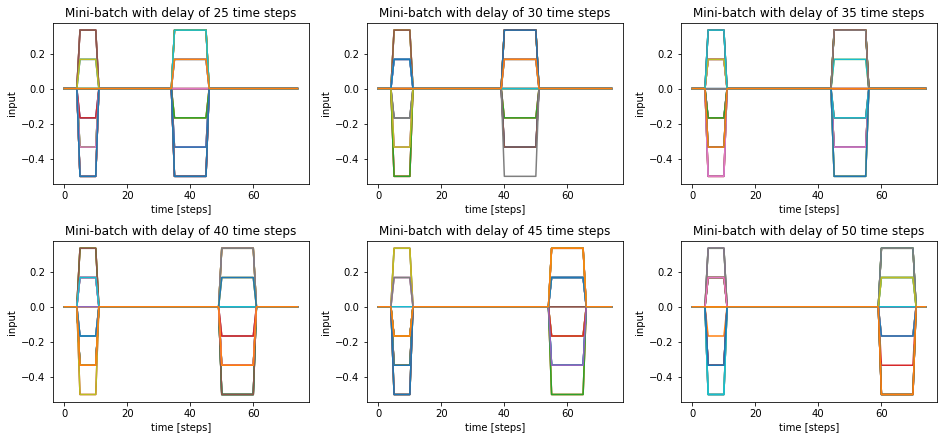

In [26]:
fig, axs = plt.subplots(2, 3, figsize = (13, n_minibatches), constrained_layout = True)

for i, ax in enumerate(axs.flatten()):
    plt.sca(ax)
    plt.plot(U_PM_curr[i].T)
    plt.title(f'Mini-batch with delay of {(i*5)+25} time steps')
    plt.xlabel('time [steps]')
    plt.ylabel('input')

In [27]:
loss_PM_curr = open_data('pwm_ex3_loss_PM_curr')

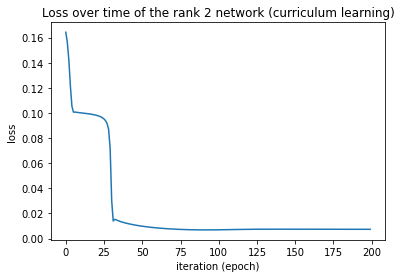

In [28]:
plt.plot(loss_PM_curr)
plt.title('Loss over time of the rank 2 network (curriculum learning)')
plt.xlabel('iteration (epoch)')
plt.ylabel('loss')
plt.show()

### Exercise 4

In [29]:
def plt_PM_patterns(m1, m2, n1, n2, figtitle):
    fig, axs = plt.subplots(1, 2, figsize = (10, 4), constrained_layout = True)
    fig.suptitle(figtitle, fontsize=14)

    axs[0].set_title(r'$\mathbf{m^{(1)}}$-$\mathbf{n^{(1)}}$ projection')
    axs[0].scatter(m1, n1)
    axs[0].set_xlabel(r'$m^{(1)}$')
    axs[0].set_ylabel(r'$n^{(1)}$', rotation = 'horizontal')
    
    axs[1].set_title(r'$\mathbf{m^{(2)}}$-$\mathbf{n^{(2)}}$ projection')
    axs[1].scatter(m2, n2)
    axs[1].set_xlabel(r'$m^{(2)}$')
    axs[1].set_ylabel(r'$n^{(2)}$', rotation = 'horizontal')
    plt.show()

In [30]:
cov_PM = open_data('pwm_ex4_cov_PM')
mnIw_PM = open_data('pwm_ex4_mnIw_PM')
np.fill_diagonal(cov_PM, 0)
cov_labels_PM = ['n1', 'n2', 'm1', 'm2', 'w', 'I']

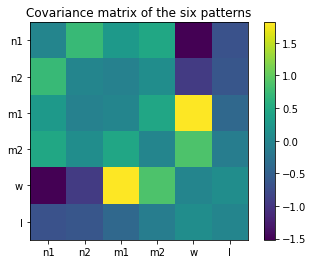

In [31]:
plt_cov(cov_PM, 'Covariance matrix of the six patterns', cov_labels_PM)

Covariance matrix with diagonals artificially set to zero.

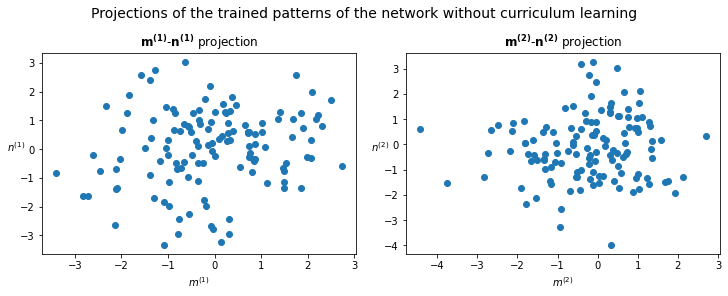

In [32]:
plt_PM_patterns(mnIw_PM[0], mnIw_PM[1], mnIw_PM[2], mnIw_PM[3], 
                figtitle='Projections of the trained patterns of the network without curriculum learning')

In [33]:
cov_curr = open_data('pwm_ex4_cov_curr')
mnIw_curr = open_data('pwm_ex4_mnIw_curr')
np.fill_diagonal(cov_curr, 0)

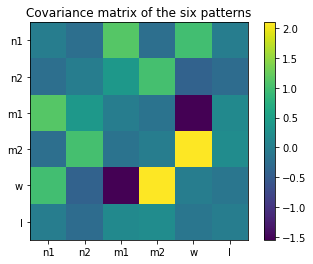

In [34]:
plt_cov(cov_curr, 'Covariance matrix of the six patterns', cov_labels_PM)

Covariance matrix with diagonals artificially set to zero.

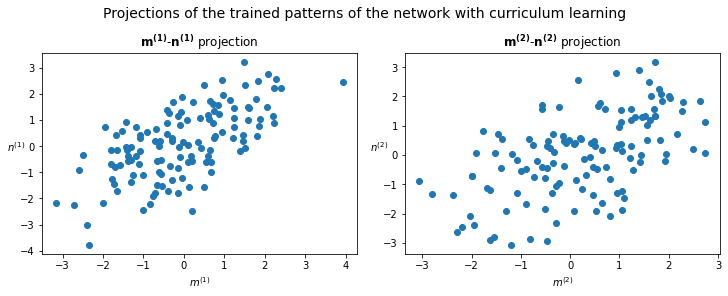

In [35]:
plt_PM_patterns(mnIw_curr[0], mnIw_curr[1], mnIw_curr[2], mnIw_curr[3], 
                figtitle='Projections of the trained patterns of the network with curriculum learning')

### Exercise 6

In [36]:
cov_sampled_curr = open_data('pwm_ex6_cov')
np.fill_diagonal(cov_sampled_curr, 0)

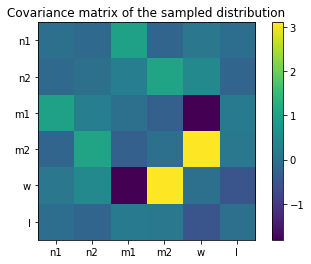

In [37]:
plt_cov(cov_sampled_curr, 'Covariance matrix of the sampled distribution', cov_labels_PM)

### Exercise 5

In [38]:
trial_size = 192
m1_m2_space = open_data('pwm_ex5_m1m2space')
x_t_curr_flattened = open_data('pwm_ex5_xt')
x_t_curr = x_t_curr_flattened.reshape(x_t_curr_flattened.shape[0], 192, t_steps)

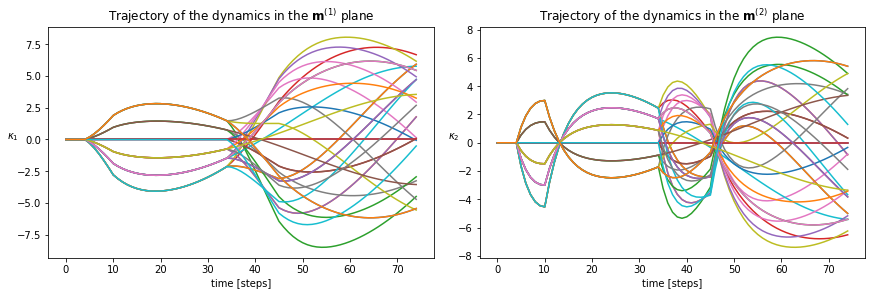

In [39]:
fig, axs = plt.subplots(1, 2, figsize = (12, 4), constrained_layout = True)

for trial in range(data_size):
    x_projected_curr = m1_m2_space @ x_t_curr[:,trial,:]
    axs[0].plot(x_projected_curr[0])
    axs[1].plot(x_projected_curr[1])

axs[0].set_title(r'Trajectory of the dynamics in the $\mathbf{m}^{(1)}$ plane')
axs[0].set_ylabel(r'$\kappa_1$', rotation = 'horizontal')
axs[1].set_title(r'Trajectory of the dynamics in the $\mathbf{m}^{(2)}$ plane')
axs[1].set_ylabel(r'$\kappa_2$', rotation = 'horizontal')


for i in range(2):
    axs[i].set_xlabel('time [steps]')
plt.show()

### Exercise 7

In [40]:
kappa_curr_flattened = open_data('pwm_ex7_kappa')
kappa_curr = kappa_curr_flattened.reshape(kappa_curr_flattened.shape[0], t_steps, rank)

nu_curr = open_data('pwm_ex7_nu')
z_curr = open_data('pwm_ex7_z')

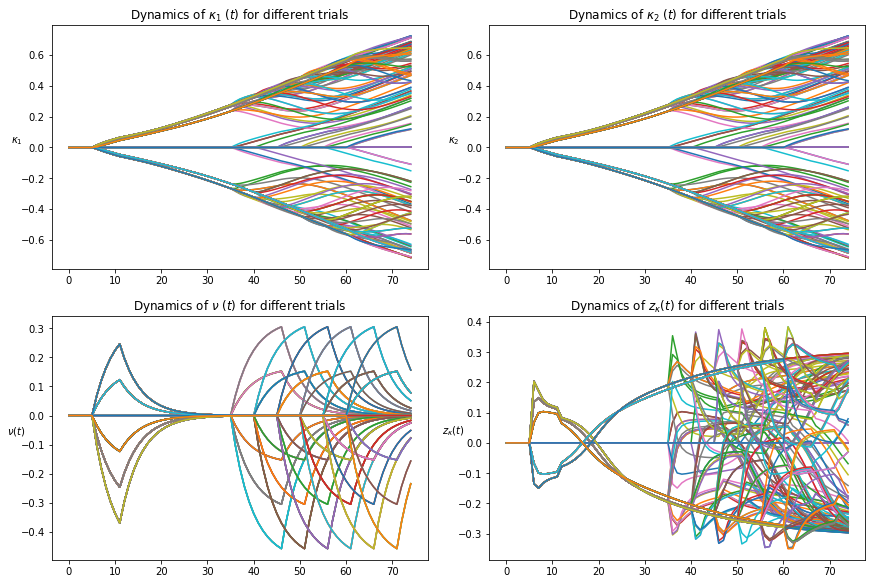

In [41]:
fig, axs = plt.subplots(2, 2, figsize = (12, 8), constrained_layout = True)

for i in range(2):
    axs[0,i].plot(kappa_curr[:,:,i].T)
    axs[0,i].set_title(fr'Dynamics of $\kappa_{i+1} \; (t)$ for different trials')
    axs[0,i].set_ylabel(fr'$\kappa_{i+1}$', rotation = 'horizontal')
    
axs[1,0].plot(nu_curr.T)
axs[1,0].set_ylabel(r'$\nu (t)$', rotation = 'horizontal')
axs[1,0].set_title(r'Dynamics of $\nu \; (t)$ for different trials')

axs[1,1].plot(z_curr.T)
axs[1,1].set_ylabel(r'$z_{\kappa}(t)$', rotation = 'horizontal')
axs[1,1].set_title(r'Dynamics of $z_{\kappa}(t)$ for different trials')

plt.show()